# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | oranjestad
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | lakatoro
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | casper
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | padam
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | yokadouma
Processing Record 22 of Set 1 | constantia
Pr

Processing Record 37 of Set 4 | as safirah
Processing Record 38 of Set 4 | naama
Processing Record 39 of Set 4 | aasiaat
Processing Record 40 of Set 4 | arteche
Processing Record 41 of Set 4 | saint croix
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | okha
Processing Record 44 of Set 4 | zakamensk
Processing Record 45 of Set 4 | pueblo nuevo
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | princeton
Processing Record 48 of Set 4 | natchez
Processing Record 49 of Set 4 | guayaramerin
Processing Record 0 of Set 5 | strezhevoy
Processing Record 1 of Set 5 | tambacounda
Processing Record 2 of Set 5 | rio gallegos
Processing Record 3 of Set 5 | freetown
Processing Record 4 of Set 5 | jalalpur
Processing Record 5 of Set 5 | labrador city
Processing Record 6 of Set 5 | sinabang
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | viveiro
Processing Record 9 of Set 5 | plettenberg bay
Processing Record 10 of Set 5 | balzers
Processi

Processing Record 29 of Set 8 | susuman
Processing Record 30 of Set 8 | manturovo
Processing Record 31 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 32 of Set 8 | georgetown
Processing Record 33 of Set 8 | chernyshevskiy
Processing Record 34 of Set 8 | chifeng
Processing Record 35 of Set 8 | shingu
Processing Record 36 of Set 8 | hidalgo
Processing Record 37 of Set 8 | sakakah
Processing Record 38 of Set 8 | hopelchen
Processing Record 39 of Set 8 | gouyave
Processing Record 40 of Set 8 | antigonish
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | port hueneme
Processing Record 43 of Set 8 | usinsk
Processing Record 44 of Set 8 | kiama
Processing Record 45 of Set 8 | queenstown
Processing Record 46 of Set 8 | miquelon
Processing Record 47 of Set 8 | utrik
Processing Record 48 of Set 8 | slanic
Processing Record 49 of Set 8 | portland
Processing Record 0 of Set 9 | kirensk
Processing Record 1 of Set 9 | tshabong
Processing Record 2 of 

Processing Record 19 of Set 12 | illizi
Processing Record 20 of Set 12 | totness
Processing Record 21 of Set 12 | leo
Processing Record 22 of Set 12 | uusikaupunki
Processing Record 23 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 24 of Set 12 | koshki
Processing Record 25 of Set 12 | naliya
Processing Record 26 of Set 12 | huixtla
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | lexington
Processing Record 29 of Set 12 | menongue
Processing Record 30 of Set 12 | berastagi
Processing Record 31 of Set 12 | gaiman
Processing Record 32 of Set 12 | portoferraio
Processing Record 33 of Set 12 | letlhakeng
Processing Record 34 of Set 12 | pahlgam
Processing Record 35 of Set 12 | flin flon
Processing Record 36 of Set 12 | bishkul
Processing Record 37 of Set 12 | manicore
Processing Record 38 of Set 12 | vadso
Processing Record 39 of Set 12 | guerrero negro
Processing Record 40 of Set 12 | seabra
Processing Record 41 of Set 12 | al jawf
------------

In [7]:
# Convert the cities weather data into a Pandas DataFra
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,300.23,76,86,2.04,US,1698696033
1,hamilton,39.1834,-84.5333,281.59,85,100,5.66,US,1698696224
2,oranjestad,12.5240,-70.0270,304.12,79,40,1.54,AW,1698696010
3,carnarvon,-24.8667,113.6333,292.99,74,0,8.78,AU,1698696292
4,thompson,55.7435,-97.8558,267.24,68,100,6.69,CA,1698696132


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,300.23,76,86,2.04,US,1698696033
1,hamilton,39.1834,-84.5333,281.59,85,100,5.66,US,1698696224
2,oranjestad,12.5240,-70.0270,304.12,79,40,1.54,AW,1698696010
3,carnarvon,-24.8667,113.6333,292.99,74,0,8.78,AU,1698696292
4,thompson,55.7435,-97.8558,267.24,68,100,6.69,CA,1698696132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

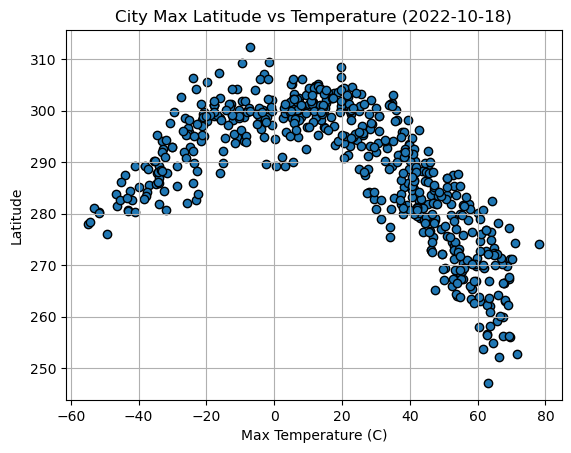

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Max Temperature (C)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

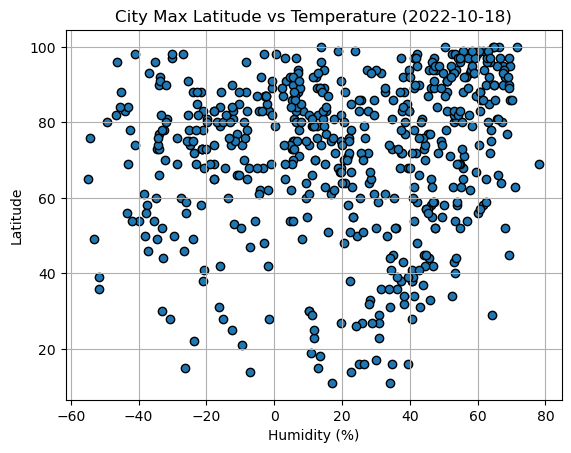

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

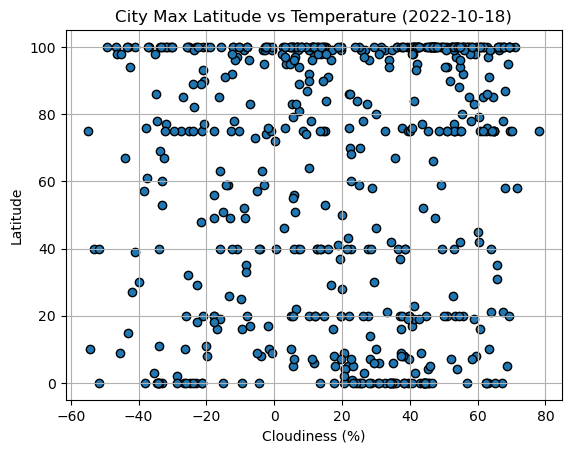

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

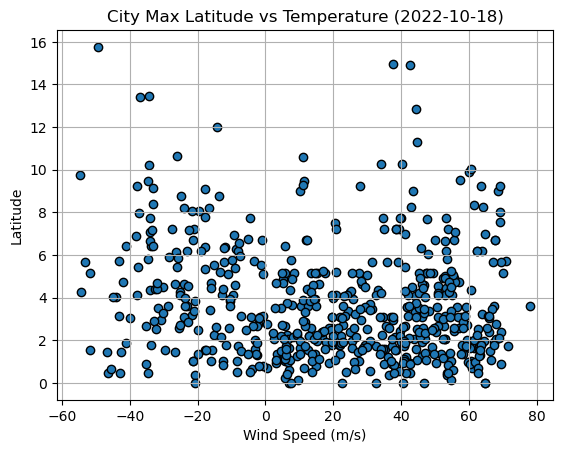

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [34]:
# Split data into northern hemispheres: based on latitude
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,300.23,76,86,2.04,US,1698696033
1,hamilton,39.1834,-84.5333,281.59,85,100,5.66,US,1698696224
2,oranjestad,12.5240,-70.0270,304.12,79,40,1.54,AW,1698696010
4,thompson,55.7435,-97.8558,267.24,68,100,6.69,CA,1698696132
6,iqaluit,63.7506,-68.5145,262.00,72,75,9.26,CA,1698696292


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,carnarvon,-24.8667,113.6333,292.99,74,0,8.78,AU,1698696292
5,lakatoro,-16.0999,167.4164,298.58,84,63,4.70,VU,1698696292
9,edinburgh of the seven seas,-37.0676,-12.3116,285.60,93,100,13.41,SH,1698696293
10,ushuaia,-54.8000,-68.3000,277.96,65,75,9.77,AR,1698696069
12,lebu,-37.6167,-73.6500,284.26,58,61,5.44,CL,1698696242


-0.8712962778179968

The r_value is None


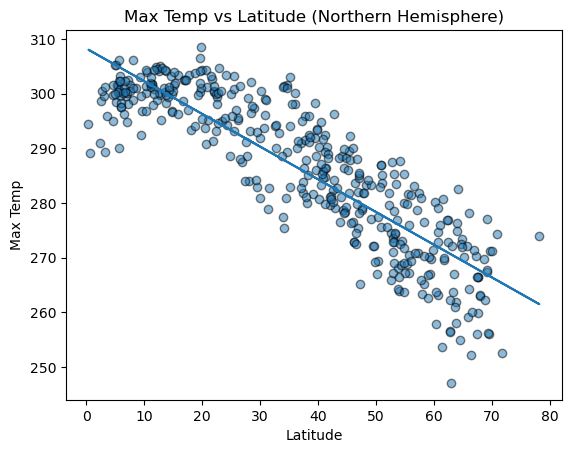

-0.8712962778179968

The r_value is None


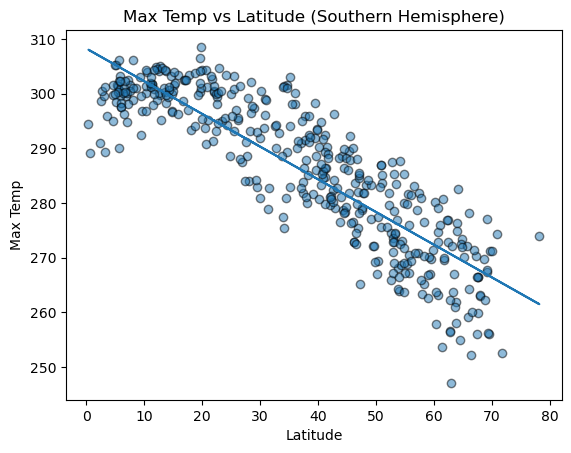

0.16583330777464886

The r_value is None


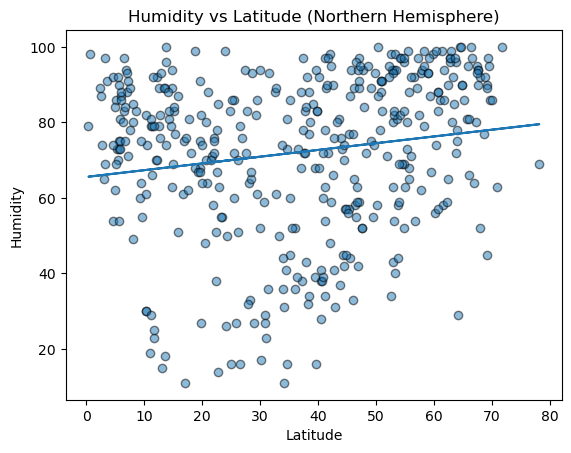

0.16583330777464886

The r_value is None


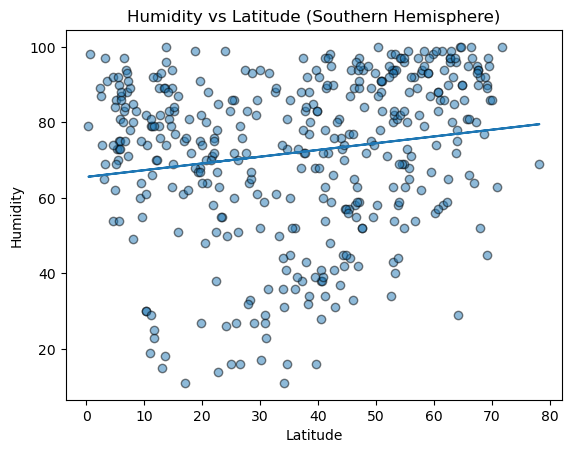

0.07109977676491273

The r_value is None


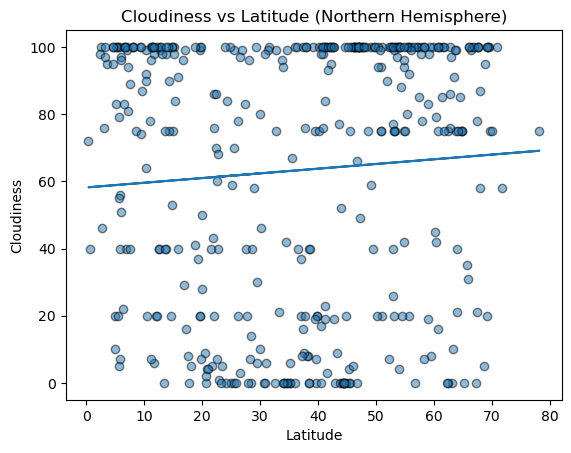

0.07109977676491273

The r_value is None


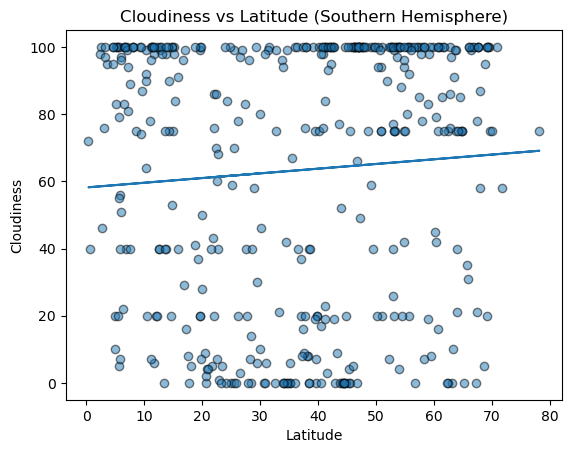

0.12287455057146768

The r_value is None


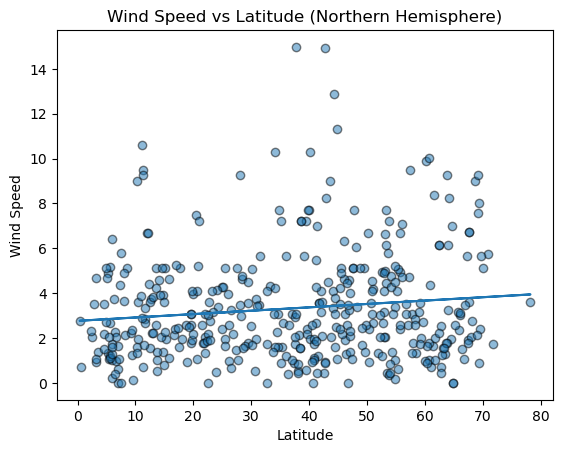

0.12287455057146768

The r_value is None


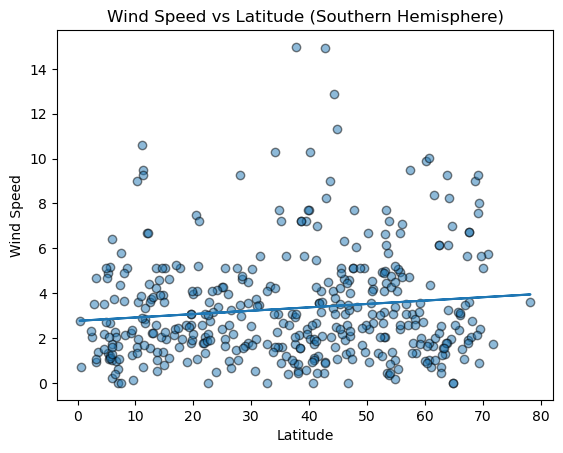

In [44]:
# y_variables
y_variables = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

for variable in y_variables:
    create_linear_regression_plot(northern_hemisphere, variable, "Northern")
    create_linear_regression_plot(northern_hemisphere, variable, "Southern")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,300.23,76,86,2.04,US,1698696033
1,hamilton,39.1834,-84.5333,281.59,85,100,5.66,US,1698696224
2,oranjestad,12.5240,-70.0270,304.12,79,40,1.54,AW,1698696010
4,thompson,55.7435,-97.8558,267.24,68,100,6.69,CA,1698696132
6,iqaluit,63.7506,-68.5145,262.00,72,75,9.26,CA,1698696292


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,carnarvon,-24.8667,113.6333,292.99,74,0,8.78,AU,1698696292
5,lakatoro,-16.0999,167.4164,298.58,84,63,4.70,VU,1698696292
9,edinburgh of the seven seas,-37.0676,-12.3116,285.60,93,100,13.41,SH,1698696293
10,ushuaia,-54.8000,-68.3000,277.96,65,75,9.77,AR,1698696069
12,lebu,-37.6167,-73.6500,284.26,58,61,5.44,CL,1698696242


###  Temperature vs. Latitude Linear Regression Plot

In [47]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

NameError: name 'st' is not defined

In [ ]:
# Linear regression on Southern Hemisphere
#linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

Discussion about the linear relationship: While both plots look the same and trend in the same direction, their r_values are distinctively different. The northern hemisphere's r_value is -0.8713 while the southern hemisphere's r_value is 0.1658. When r is less than 1 there is a positive linear relationship, when r is negative 1 this means there is a perfect negative relationship. All this means is that the closer to the equator the hotter the temperature; and the converse is true as well, the further from the equator the cooler the temperature.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
#linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

In [ ]:
# Southern Hemisphere
#linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

Discussion about the linear relationship: Because there isn't a great relationship or r_value here, we cannot say with certainty. But Based on the r_values given for the northern hemisphere of 0.1658 and the southern hemisphere of 0.0711, there is a stronger relationship with Latitude and Humidity in the Northern Hemisphere. Which means the closer one gets to the equator the more humid it gets.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
#linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

In [ ]:
# Southern Hemisphere
#linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

Discussion about the linear relationship: Because there isn't a great relationship or r_value here, we cannot say with certainty. But Based on the r_values given for the northern hemisphere of 0.0711 and the southern hemisphere of 0.1229, there is a stronger relationship with Latitude and Cloudiness in the Southern Hemisphere. Which means the closer one gets to the equator the more clouds there are; but not by a lot because the r_values are not that much different.

### Wind Speed vs. Latitude Linear Regression Plot

In [32]:
# Northern Hemisphere
#linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

In [33]:
# Southern Hemisphere
#linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

Discussion about the linear relationship: Because the r_values for this plot are the same, 0.1229. We cannot say there is more wind in the northern or southern hemisphere.